# Thực hành trên bộ dữ liệu GPDList

### Bộ dữ liệu GDP list chứa dữ liệu dự báo về GDP của một số quốc gia, các thông tin được thống kê bao gồm:

* Country: Tên quốc gia
* Continent: Tên châu lục
* GDP (millions of US$): GDP tính theo đơn vị triệu USD

### Hãy đưa bộ dữ liệu vào phân tích và giải đáp các thắc mắc sau:

* Bộ dữ liệu chứa bao nhiêu dòng, bao nhiêu cột
* Thang đo tương ứng của các thuộc tính được lưu trữ
* GDP của các quốc gia có đồng đều không
* Mỗi châu lục có bao nhiêu quốc gia nằm trong bảng dữ liệu
* Tổng GPD của các châu lục
* Top 10 quốc gia có GDP cao nhất

## Import thư viện

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Đọc dữ liệu và hiển thị 10 dòng đầu tiên

In [4]:
df = pd.read_csv('/content/drive/MyDrive/PhanTichDuLieu_CodeGym/Tuan01/data/GDP.csv',encoding='utf-8', index_col = False)
df.head(10)

,Country,Continent,GDP
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644
5,Australia,Oceania,1488221
6,Austria,Europe,419243
7,Azerbaijan,Europe,62321
8,Bahrain,Asia,26108
9,Bangladesh,Asia,113032


In [5]:
df.info() # Có 125 dòng và 3 cột

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    125 non-null    object
 1   Continent  125 non-null    object
 2   GDP        125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


- Có 3 cột, cột GDP là thang đo định lượng
- Cột country và continent là thang đo nominal(định tính)

## Biểu đồ histogram

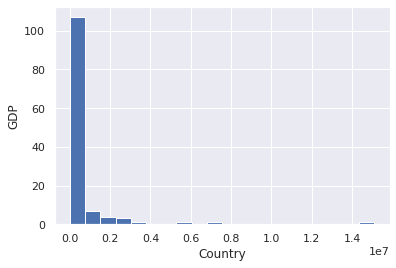

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setup style của matplotlib dưới dạng seaborn

sns.set()
plt.hist(df.GDP, bins = 20)
# Khai báo tiêu đề cho trục x
plt.xlabel('Country')
# Khai báo tiêu đề cho trục y
plt.ylabel('GDP')
plt.show()

Các quốc gia có sự phân bố GDP không đều

# Mỗi châu lục có bao nhiêu quốc gia nằm trong bảng dữ liệu

In [9]:
country_area = df.groupby(by='Continent').count()
country_area['Country']

Continent
Africa           29
Asia             36
Europe           37
North America    11
Oceania           3
South America     9
Name: Country, dtype: int64

Kết luận: 
- Khu vực châu Phi có 29 Quốc gia
- Châu Á có 36 QG
- Châu Âu có 37 Quốc gia
- Bắc Mỹ có 11 quốc gia
- Châu Đại Dương có 3 quốc gia
- Nam Mỹ có 9 Quốc gia

## Tổng GDP các châu Lục


In [11]:
total_GDP = df.groupby(by='Continent').sum()
total_GDP

,GDP
Continent,
Africa,1820811
Asia,24425891
Europe,19139380
North America,18238447
Oceania,1662727
South America,4141217


- Khu vực châu Phi có tổng GDP là 1820811
- Châu Á có tổng GDP là 24425891
- Châu Âu có tổng GDP là 19139380
- Bắc Mỹ có tổng GDP là 18238447
- Châu Đại Dương có tổng GDP là 1662727
- Nam Mỹ có tổng GDP là 4141217

## Top 10 quốc gia có GDP cao nhất

In [27]:
dframe = pd.DataFrame(data = df)
dframe

,Country,Continent,GDP
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644
...,...,...,...
120,Uzbekistan,Asia,45353
121,Venezuela,South America,315841
122,Vietnam,Asia,122722
123,Yemen,Africa,33675


## Top 10 quốc gia có GDP cao nhất

In [33]:
top = dframe.groupby(['Country'])['GDP'].sum().sort_values(ascending=False)
top.head(10)

Country
 United States     15094025
 China              7298147
 Japan              5869471
 Germany            3577031
 France             2776324
 Brazil             2492908
 United Kingdom     2417570
 Italy              2198730
 Russia             1850401
 Canada             1736869
Name: GDP, dtype: int64